In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
dias = pd.read_csv('/home/sandro/PycharmProjects/OCs-ScaleHeight-Evolution/catalogues/Dias.csv')
dias.columns

Index(['Unnamed: 0', '_Glon', '_Glat', 'Cluster', 'RA_ICRS', 'DE_ICRS', 'N',
       'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Plx', 'e_Plx', 'RV', 'e_RV',
       'Dist', 'e_Dist', 'logage', 'e_logage', '[Fe/H]', 'e_[Fe/H]', 'Av',
       'e_Av', 'dr3_rv', 'e_dr3_rv', 'N_stars_dr3_rv', 'ra_duarte',
       'dec_duarte'],
      dtype='object')

In [8]:
asteca_results = pd.read_csv('final_results.csv')
asteca_results


,cluster,distance,age,av
0,ASCC_107,844.821077,26.014510,26.014510
1,ASCC_114,890.292962,286.541615,286.541615
2,ASCC_123,233.315603,63.648186,63.648186
3,ASCC_127,376.110447,14.136705,14.136705
4,ASCC_16,333.159049,17.934133,17.934133
...,...,...,...,...
152,UPK_640,192.623307,15.768042,15.768042
153,UPK_642,920.896579,248.865152,248.865152
154,UPK_654,494.500324,289.659333,289.659333
155,UPK_7,811.313060,28.766726,28.766726


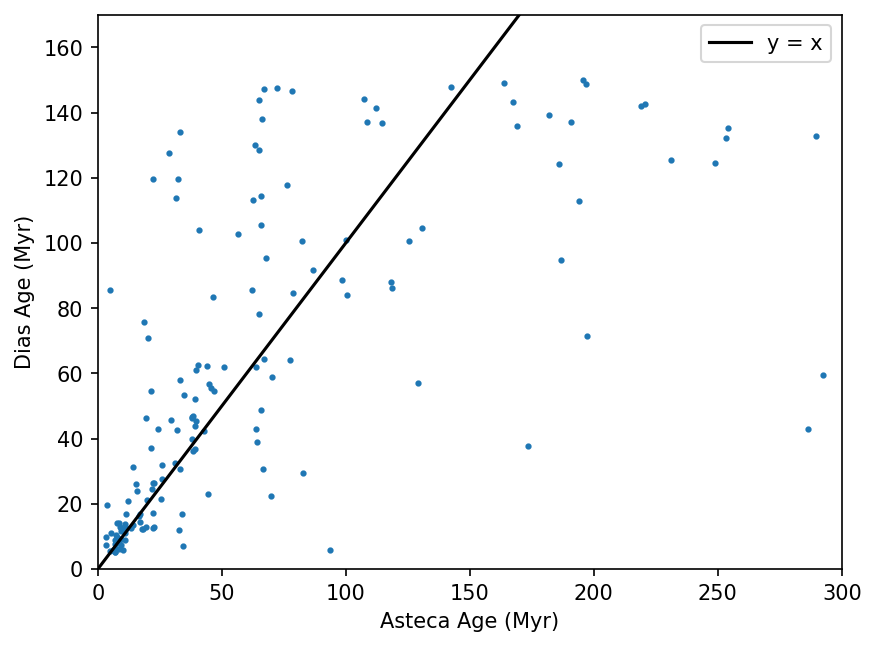

In [32]:
# Ensure we only compare clusters present in both datasets
common_clusters = np.intersect1d(asteca_results.cluster, dias.Cluster)

# Filter both datasets
asteca_filtered = asteca_results[asteca_results.cluster.isin(common_clusters)]
dias_filtered = dias[dias.Cluster.isin(common_clusters)]

# Align both datasets by cluster
dias_filtered = dias_filtered.set_index("Cluster").loc[asteca_filtered.cluster].reset_index()

# Convert Dias logage to Myr
dias_ages = 10**dias_filtered.logage / 10**6  # Convert log(age) to Myr

# Plot
plt.figure(dpi=150)
plt.scatter(asteca_filtered.age, dias_ages, s=4)
plt.plot([0, 300], [0, 300], label="y = x", color="black")  # Reference line for perfect match
plt.xlabel("Asteca Age (Myr)")
plt.ylabel("Dias Age (Myr)")
plt.ylim(0, 170)
plt.xlim(0, 300)
plt.legend()
plt.show()


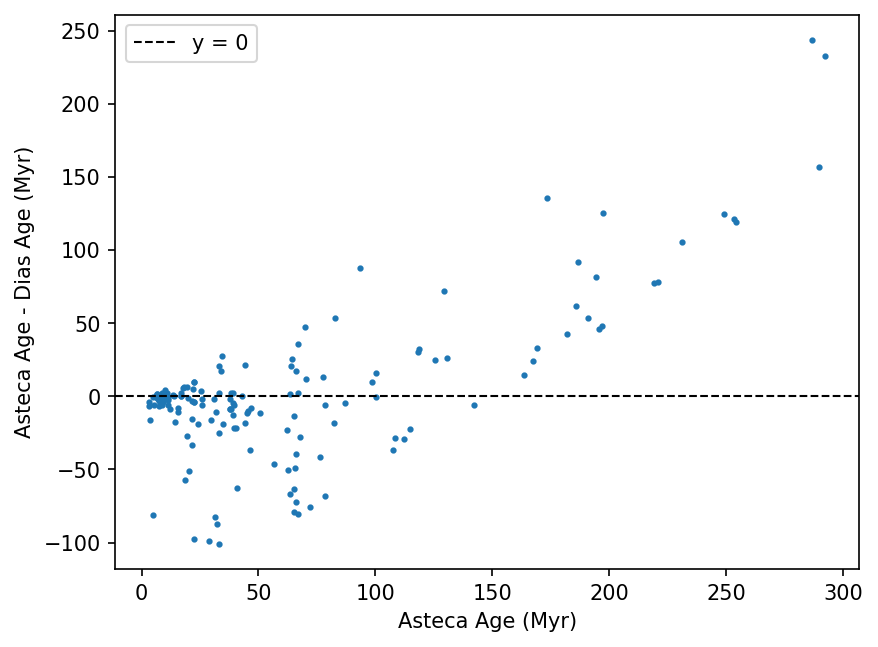

In [35]:
# Compute the difference
age_diff = asteca_filtered.age - dias_ages

# Plot
plt.figure(dpi=150)
plt.scatter(asteca_filtered.age, age_diff, s=4)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Asteca Age (Myr)")
plt.ylabel("Asteca Age - Dias Age (Myr)")
#plt.ylim(-50, 170)
plt.legend()
plt.show()

In [42]:
np.mean(age_diff/asteca_filtered.age*100)

-38.774702133071266

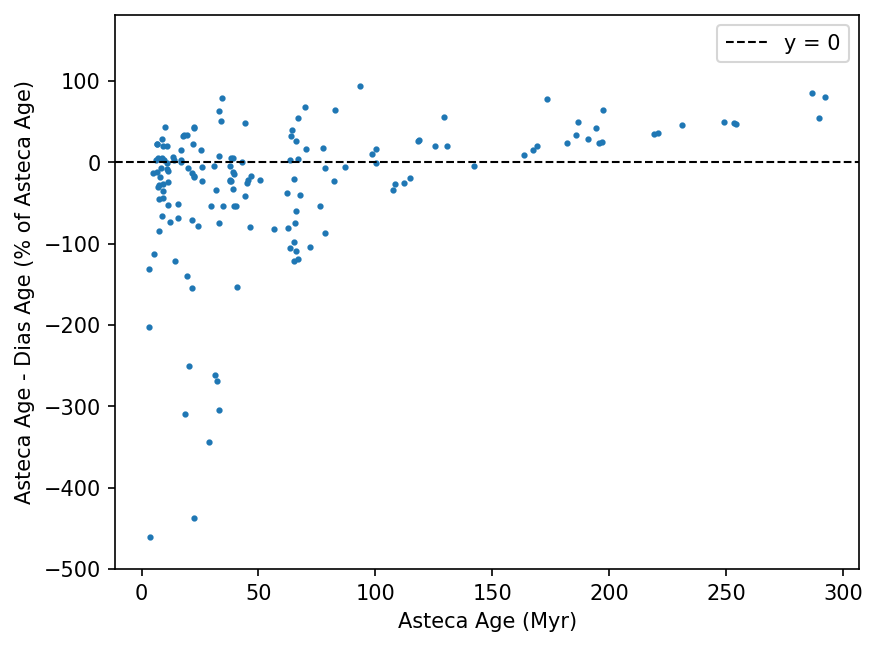

In [40]:
# Compute the difference
age_diff = asteca_filtered.age - dias_ages

# Plot
plt.figure(dpi=150)
plt.scatter(asteca_filtered.age, age_diff/asteca_filtered.age*100, s=4)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Asteca Age (Myr)")
plt.ylabel("Asteca Age - Dias Age (% of Asteca Age)")
plt.ylim(-500, None)
plt.legend()
plt.show()

In [1]:
import pandas as pd

In [5]:
a = pd.read_csv('Dias_Members_Final.csv')
len(a.Cluster.unique())

164

In [12]:
b = pd.read_csv('OCs_1kpc_150_xmatch.csv', sep=';')
b

,cluster,age_Dias,plx_dist_Dias,iso_dist_Dias,r_sun_Dias,av_Dias,age_Hunt,plx_dist_Hunt,iso_dist_Hunt,r_sun_Hunt,av_Hunt,age_CantatGaudin,plx_dist_CantatGaudin,iso_dist_CantatGaudin,r_sun_CantatGaudin,av_CantatGaudin,iso_age,iso_av
0,ASCC_105,NaN,NaN,NaN,NaN,NaN,93.4,563.1,553.4,562.7,0.3,74.1,560.9,567.0,560.5,0.4,102.0,0.25
1,ASCC_107,27.5,894.5,864.0,894.0,1.4,24.3,897.1,867.3,896.6,1.5,17.0,901.7,870.0,901.2,1.7,18.0,1.10
2,ASCC_114,42.9,940.7,911.0,940.6,1.2,32.5,943.0,917.6,942.8,1.1,47.9,938.1,908.0,937.9,0.9,48.0,0.85
3,ASCC_115,NaN,NaN,NaN,NaN,NaN,77.8,777.0,753.4,776.3,0.8,131.8,762.8,731.0,762.0,0.7,90.0,0.70
4,ASCC_123,62.1,233.3,233.0,232.7,0.3,NaN,NaN,NaN,NaN,NaN,44.7,234.6,229.0,234.0,0.0,50.0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,UPK_82,NaN,NaN,NaN,NaN,NaN,77.9,548.9,537.9,548.8,0.2,81.3,542.9,554.0,542.9,0.4,80.0,0.25
193,UPK_88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7,294.1,279.0,287.9,0.3,NaN,NaN
194,UPK_90,NaN,NaN,NaN,NaN,NaN,122.1,814.8,789.8,814.7,0.8,49.0,814.3,791.0,814.3,0.8,140.0,0.90
195,vdBergh_80,6.2,974.7,947.0,963.0,1.7,NaN,NaN,NaN,NaN,NaN,6.5,975.6,910.0,963.9,1.5,NaN,NaN


In [9]:
b = b[b.cluster.isin(asteca_results.cluster)].iso_age
b

1       18.0
2       48.0
4       50.0
5       20.0
6       12.0
       ...  
188     60.0
189     16.0
190    100.0
191    120.0
195      NaN
Name: iso_age, Length: 134, dtype: float64

In [54]:
import numpy as np

# Ensure we only compare clusters present in both datasets
common_clusters = np.intersect1d(asteca_results.cluster, b[~b.iso_age.isna()].cluster)

# Filter both datasets
asteca_filtered = asteca_results[asteca_results.cluster.isin(common_clusters)].reset_index()
dias_filtered = b[b.cluster.isin(common_clusters)]

# Align both datasets by cluster
dias_filtered = dias_filtered.set_index("cluster").loc[asteca_filtered.cluster].reset_index()

,cluster,age_Dias,plx_dist_Dias,iso_dist_Dias,r_sun_Dias,av_Dias,age_Hunt,plx_dist_Hunt,iso_dist_Hunt,r_sun_Hunt,av_Hunt,age_CantatGaudin,plx_dist_CantatGaudin,iso_dist_CantatGaudin,r_sun_CantatGaudin,av_CantatGaudin,iso_age,iso_av
0,ASCC_107,27.5,894.5,864.0,894.0,1.4,24.3,897.1,867.3,896.6,1.5,17.0,901.7,870.0,901.2,1.7,18.0,1.10
1,ASCC_114,42.9,940.7,911.0,940.6,1.2,32.5,943.0,917.6,942.8,1.1,47.9,938.1,908.0,937.9,0.9,48.0,0.85
2,ASCC_123,62.1,233.3,233.0,232.7,0.3,NaN,NaN,NaN,NaN,NaN,44.7,234.6,229.0,234.0,0.0,50.0,0.30
3,ASCC_127,31.3,382.0,365.0,381.0,0.7,12.2,376.6,374.2,375.5,0.3,18.2,379.8,376.0,378.8,0.4,20.0,0.30
4,ASCC_16,12.2,351.6,348.0,333.7,0.2,NaN,NaN,NaN,NaN,NaN,13.5,352.4,344.0,334.4,0.2,12.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,UPK_624,64.1,318.5,332.0,313.0,0.5,NaN,NaN,NaN,NaN,NaN,39.8,319.5,317.0,313.9,0.5,28.0,0.30
103,UPK_630,112.7,947.9,896.0,946.8,0.6,96.3,935.3,897.2,934.2,0.6,112.2,955.1,892.0,954.0,0.2,60.0,0.40
104,UPK_640,23.9,176.5,173.0,176.0,0.2,9.6,175.3,173.9,174.6,0.2,25.1,176.3,174.0,175.7,0.4,16.0,0.05
105,UPK_642,124.5,976.6,943.0,971.4,0.4,100.0,976.0,931.0,970.9,0.4,NaN,NaN,NaN,NaN,NaN,100.0,0.30


In [ ]:
# Compute the difference
age_diff = asteca_filtered.age - dias_filtered.iso_age

# Plot
plt.figure(dpi=150)
plt.scatter(asteca_filtered.age.values, asteca_filtered.age.values - dias_filtered.iso_age.values, s=4)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Asteca Age (Myr)")
plt.ylabel("Asteca Age - Pedro (Myr)")
#plt.ylim(-50, 170)
plt.legend()
plt.show()


## Asteca Parsec vs Baraffe

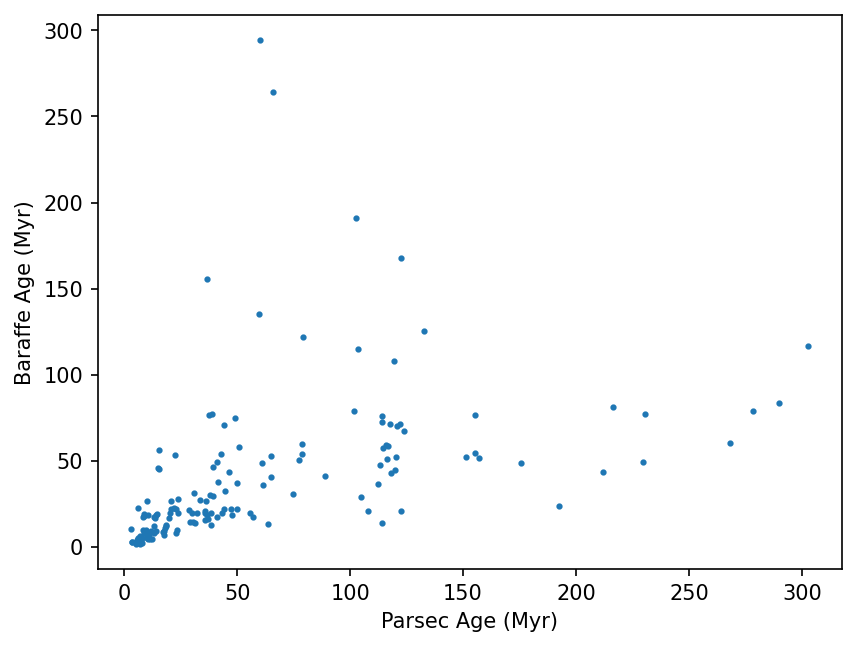

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
a = pd.read_csv('./ResultsBaraffeUBVRI_cut/ResultsBaraffeUBVRI_cut.csv')
b = pd.read_csv('./ResultsParsecUBVRI/ResultsParsecUBVRI.csv')

# Merge on the "clusters" column
merged = a.merge(b, on="cluster", suffixes=("_baraffe", "_parsec"))

plt.figure(dpi=150)

# Scatter plot
plt.scatter(merged["age_parsec"], merged["age_baraffe"], s=4)
plt.xlabel("Parsec Age (Myr)")
plt.ylabel("Baraffe Age (Myr)")
plt.show()


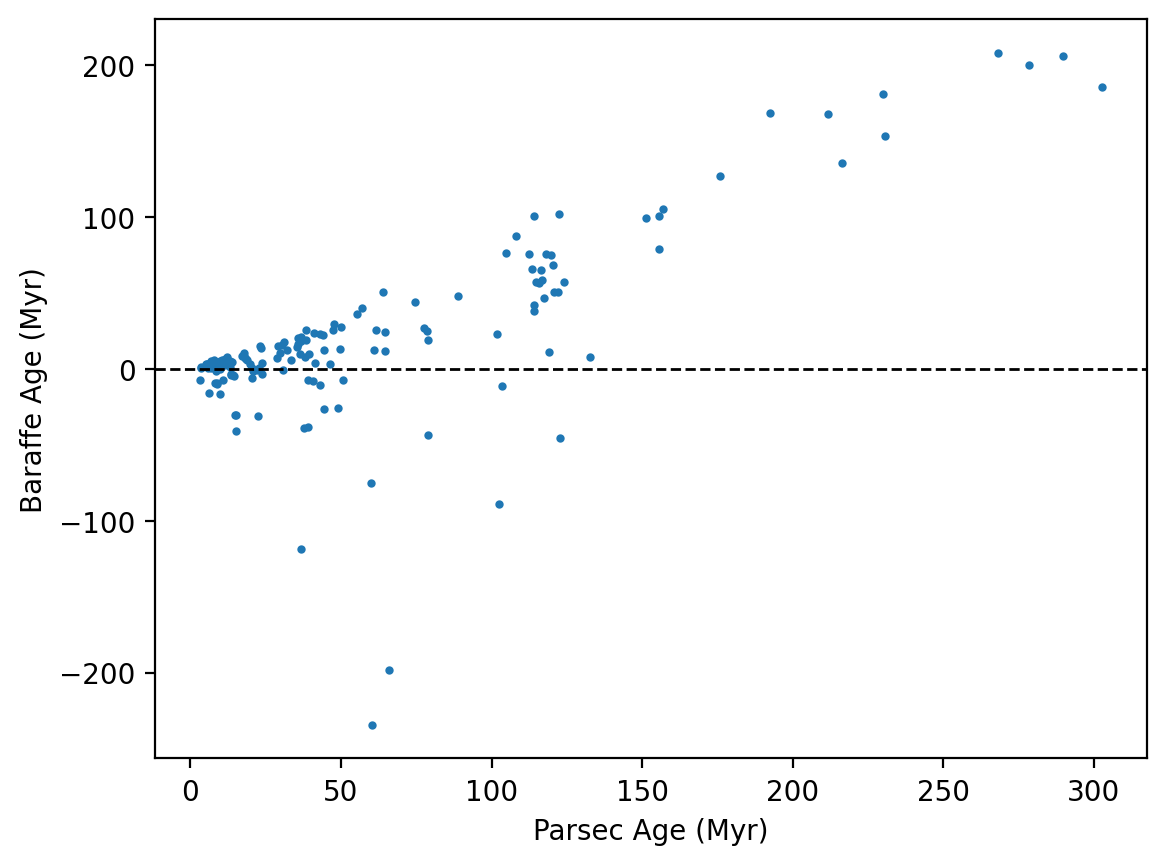

In [14]:
plt.figure(dpi=200)

# Scatter plot
plt.scatter(merged["age_parsec"], merged["age_parsec"] - merged["age_baraffe"], s=4)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Parsec Age (Myr)")
plt.ylabel("Baraffe Age (Myr)")
plt.show()

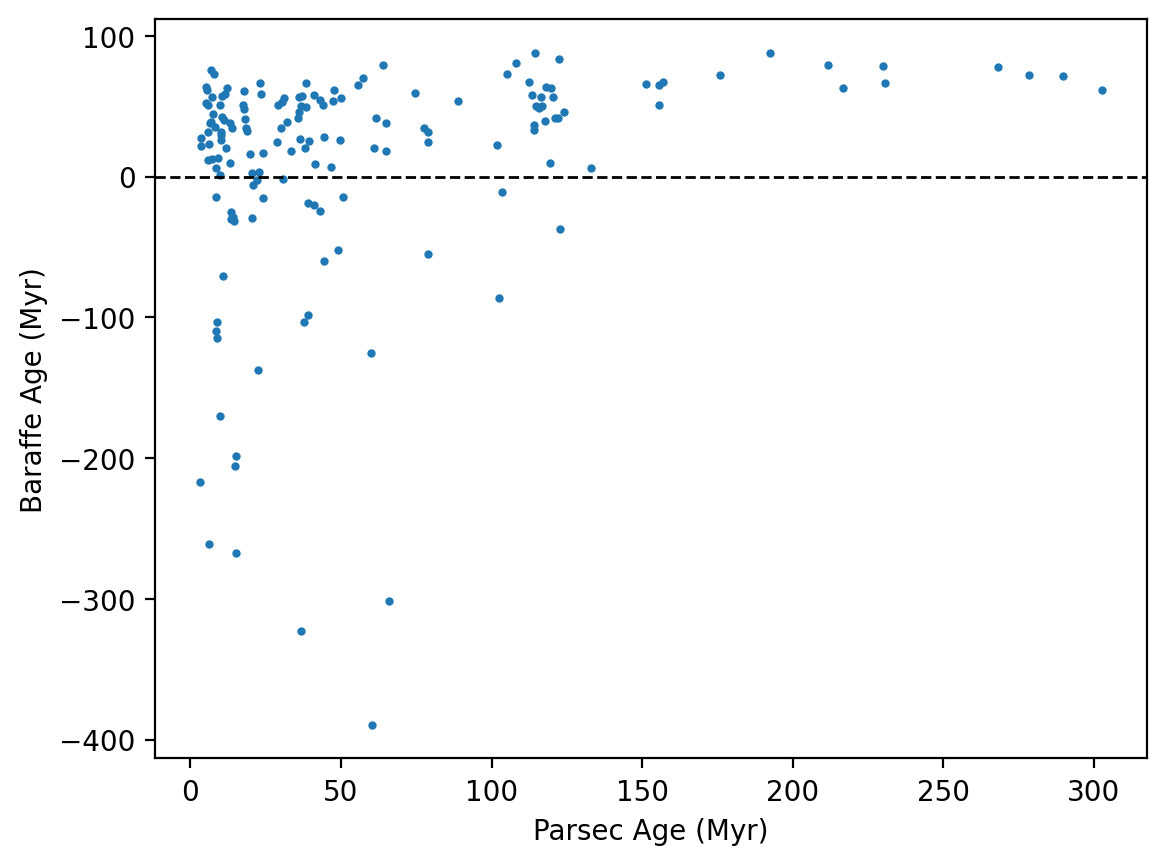

In [16]:
plt.figure(dpi=200)

# Scatter plot
plt.scatter(merged["age_parsec"], (merged["age_parsec"] - merged["age_baraffe"])/merged["age_parsec"]*100, s=4)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Parsec Age (Myr)")
plt.ylabel("Baraffe Age (Myr)")
plt.show()

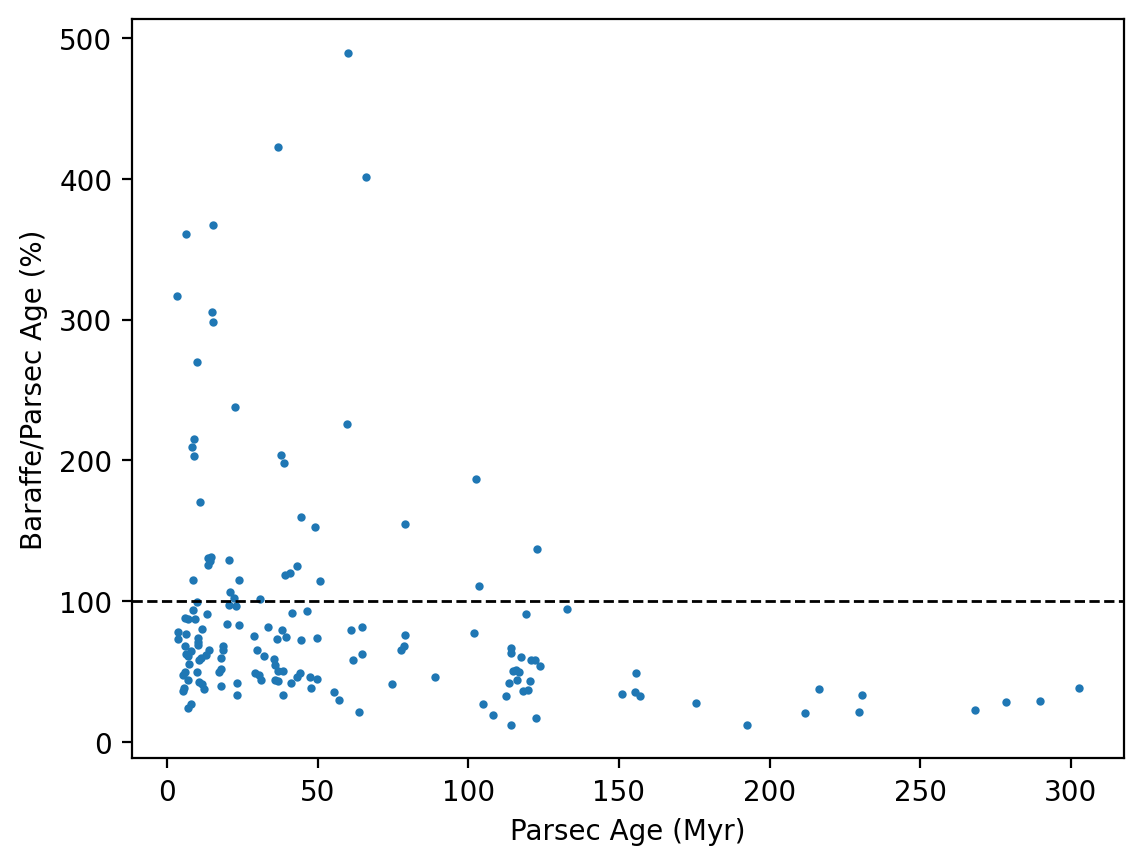

In [45]:
plt.figure(dpi=200)

# Scatter plot
plt.scatter(merged["age_parsec"], merged["age_baraffe"]/merged["age_parsec"]*100, s=4)
plt.axhline(100, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Parsec Age (Myr)")
plt.ylabel("Baraffe/Parsec Age (%)")
plt.show()

## Asteca Baraffe vs Dias

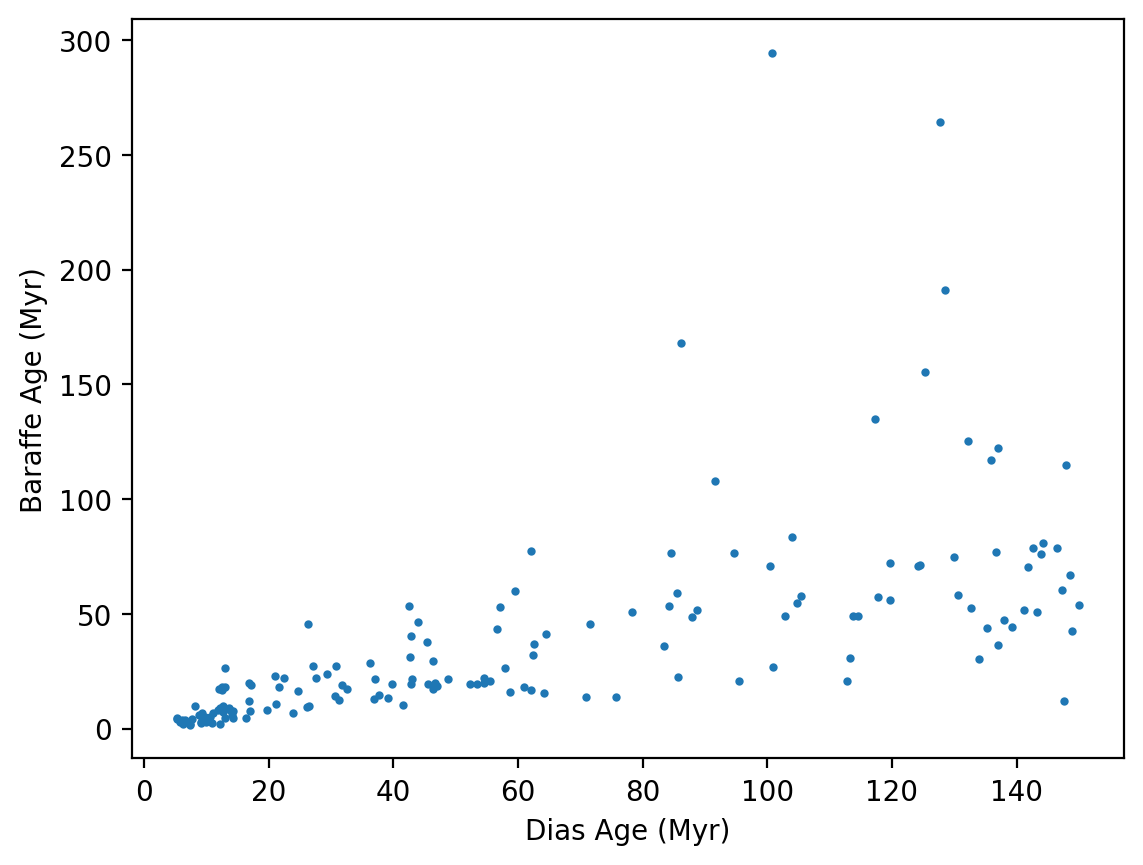

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from catalogues import get_catalogue

# Load datasets
a = pd.read_csv('./ResultsBaraffeUBVRI_cut/ResultsBaraffeUBVRI_cut.csv')
dias = get_catalogue(["Dias"])[0]  # Get Dias catalogue

# Merge on the "clusters" column
merged = a.merge(dias, on="cluster", suffixes=("_baraffe", "_dias"))

plt.figure(dpi=200)
# Scatter plot
plt.scatter(merged["age_dias"], merged["age_baraffe"], s=4)
plt.xlabel("Dias Age (Myr)")
plt.ylabel("Baraffe Age (Myr)")
plt.show()


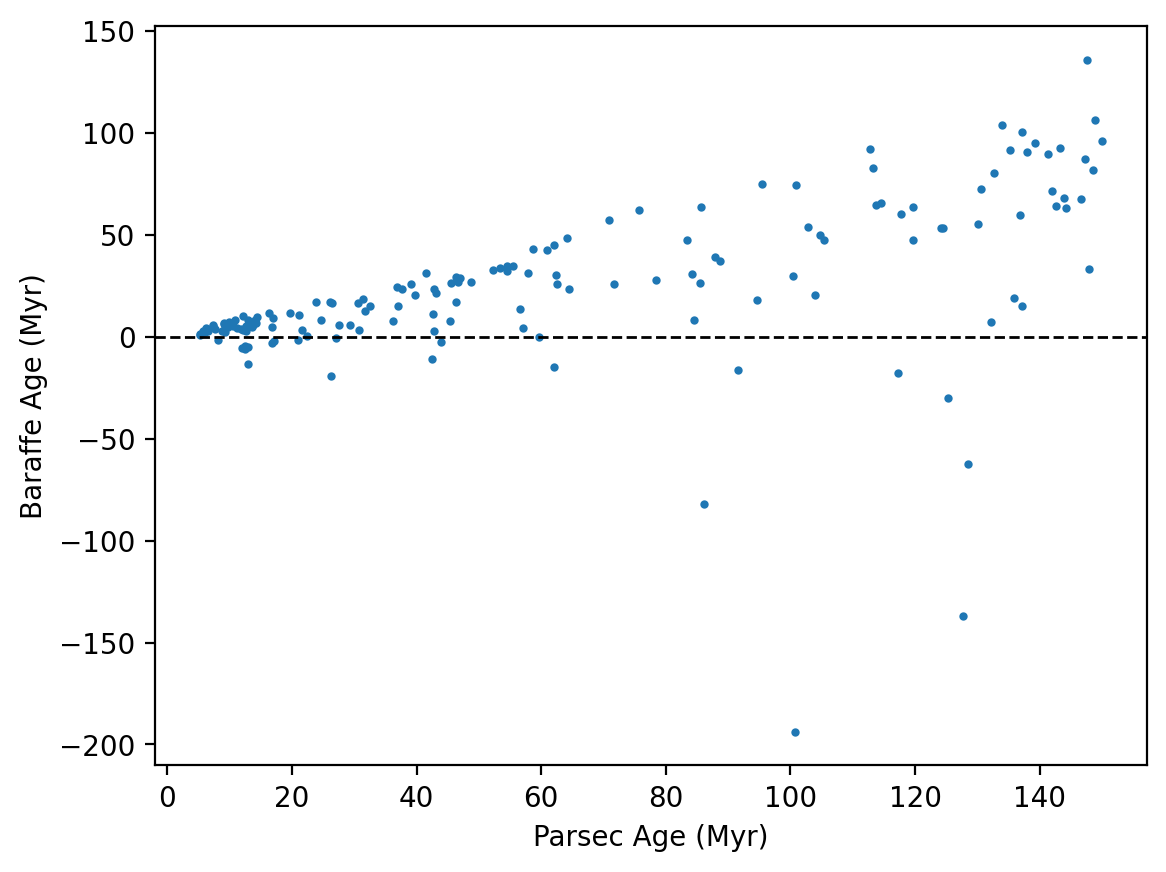

In [26]:
plt.figure(dpi=200)

# Scatter plot
plt.scatter(merged["age_dias"], merged["age_dias"] - merged["age_baraffe"], s=4)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Parsec Age (Myr)")
plt.ylabel("Baraffe Age (Myr)")
plt.show()


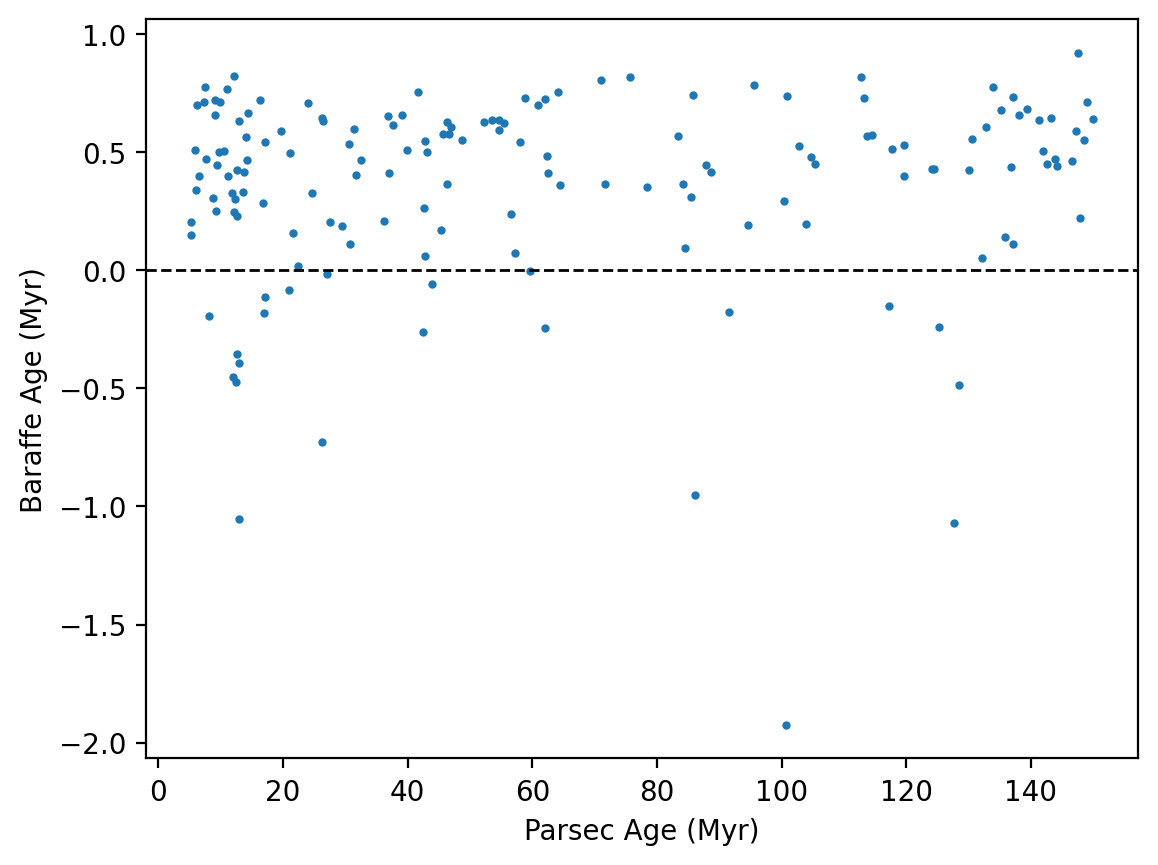

In [27]:
plt.figure(dpi=200)

# Scatter plot
plt.scatter(merged["age_dias"], (merged["age_dias"] - merged["age_baraffe"])/merged["age_dias"], s=4)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1, label="y = 0")  # Reference line at zero difference
plt.xlabel("Parsec Age (Myr)")
plt.ylabel("Baraffe Age (Myr)")
plt.show()


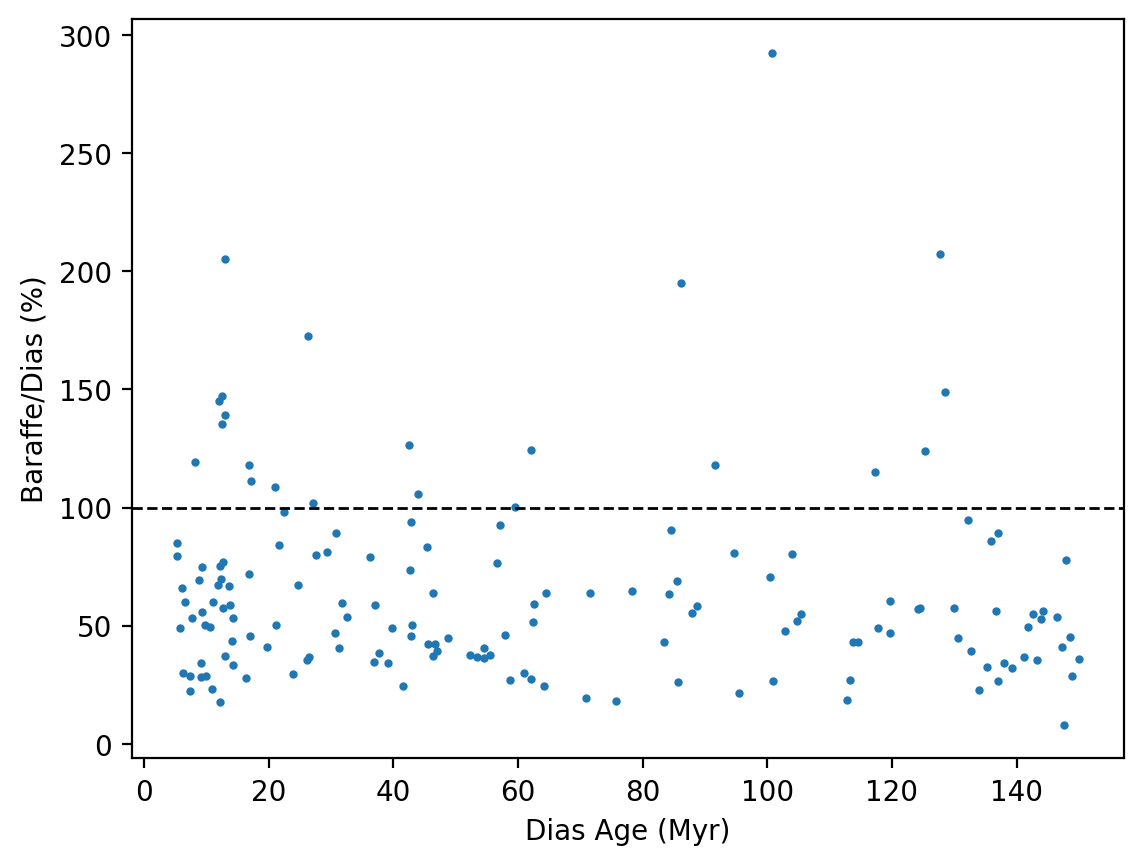

In [33]:
plt.figure(dpi=200)

# Scatter plot
plt.scatter(merged["age_dias"], merged["age_baraffe"]/merged["age_dias"]*100, s=4)
plt.axhline(100, color="black", linestyle="dashed", linewidth=1, label="y = 100")  # Reference line at zero difference
plt.xlabel("Dias Age (Myr)")
plt.ylabel("Baraffe/Dias (%)")
plt.show()

In [38]:
np.median(merged["age_baraffe"]/merged["age_dias"]*100)

AttributeError: module 'numpy' has no attribute 'madstd'

In [39]:
from scipy import stats

stats.median_abs_deviation(merged["age_baraffe"]/merged["age_dias"]*100)

18.05849022153702

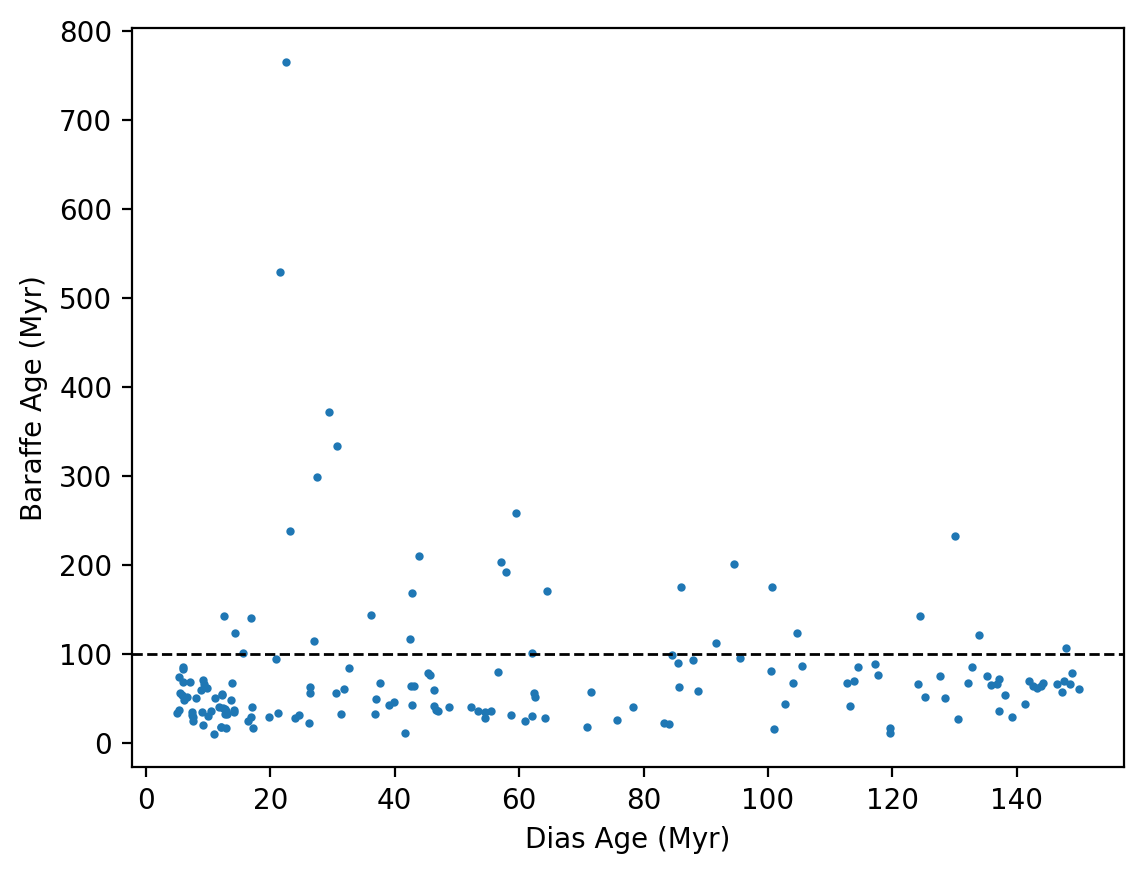

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from catalogues import get_catalogue

# Load datasets
a = pd.read_csv('./ResultsBaraffeGaia_CCD/ResultsBaraffeGaia_CCD.csv')
dias = get_catalogue(["Dias"])[0]  # Get Dias catalogue

# Merge on the "clusters" column
merged = a.merge(dias, on="cluster", suffixes=("_baraffe", "_dias"))

plt.figure(dpi=200)
# Scatter plot
plt.scatter(merged["age_dias"], merged["age_baraffe"]/merged["age_dias"]*100, s=4)
plt.axhline(100, color="black", linestyle="dashed", linewidth=1, label="y = 100")
plt.xlabel("Dias Age (Myr)")
plt.ylabel("Baraffe Age (Myr)")
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

#a = pd.read_csv('ResultsBaraffeGaia/ResultsBaraffeGaia.csv')
a = pd.read_csv('ResultsBaraffeGaia_CCD/ResultsBaraffeGaia_CCD.csv')
b = pd.read_csv('ResultsParsecGaia/ResultsParsecGaia.csv')

# Merge on the "clusters" column
merged = a.merge(b, on="cluster", suffixes=("_ccd", ""))

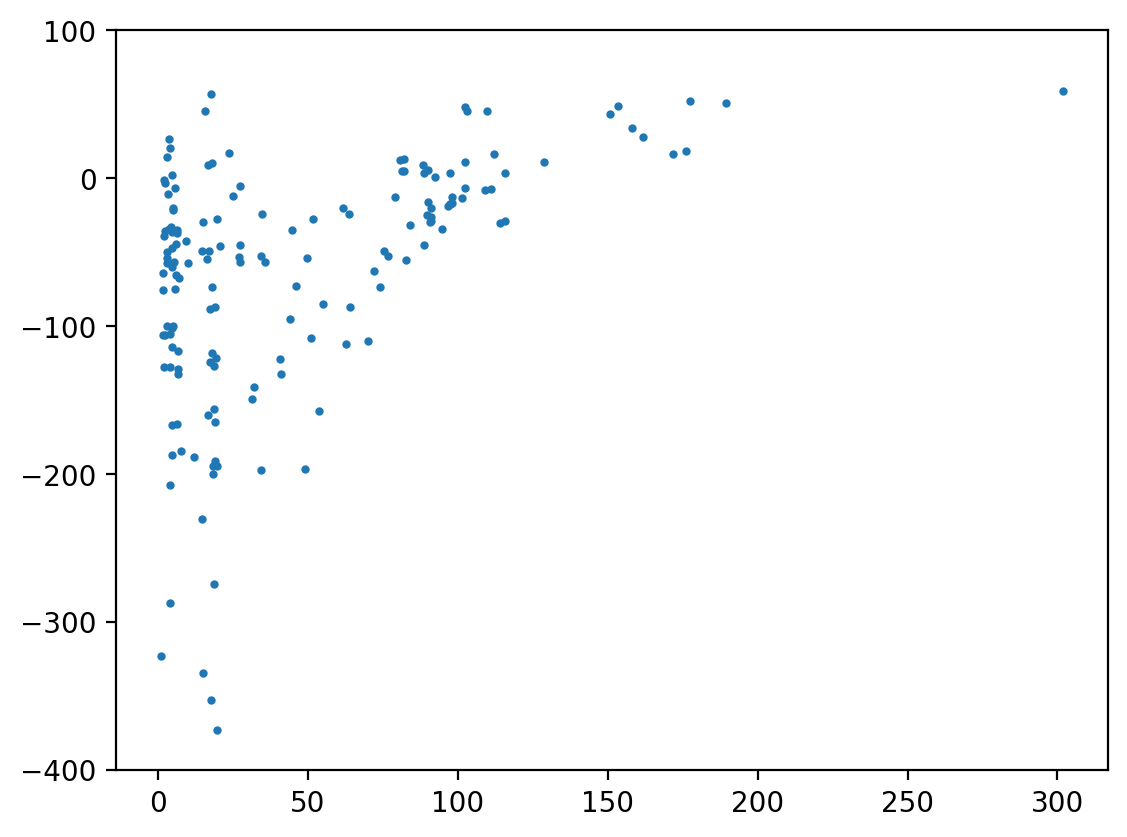

In [34]:
plt.figure(dpi=200)
plt.scatter(merged['age_ccd'], (merged['age_ccd'] - merged['age'])/merged['age_ccd']*100, s=4)
plt.ylim(-400, 100)
plt.show()